In [1]:
#By Franklin Li
#Purpose: The purpose of this assignment is to employ data visualization techniques to observe financial and epidemiological trends,
# to inspect the skewness and kurtosis of a distribution of the DJIA daily adjusted closing prices, to perform various data preprocessing tasks in relation to
# natural language processing prior to conducting sentiment analysis, and to reflect on the ethical, educational, legal implications of relying on AI-generated code.
# Date Created: November 18, 2024
# Date Modified: November 25, 2024
###################################################################

#Setup
from google.colab import drive # google.colab package's "drive" module is imported into Colab's working environment
drive.mount("/drive", force_remount= True) #Google Drive is mounted onto Colab's "drive" directory;
#Google Drive is forced to remount onto Colab's "drive" directory if the former becomes disconnected from the latter

#working directory of Colab environment is set to specified Google Drive folder
%cd "/drive/MyDrive/GitHub Uploads"



Mounted at /drive
/drive/MyDrive/GitHub Uploads


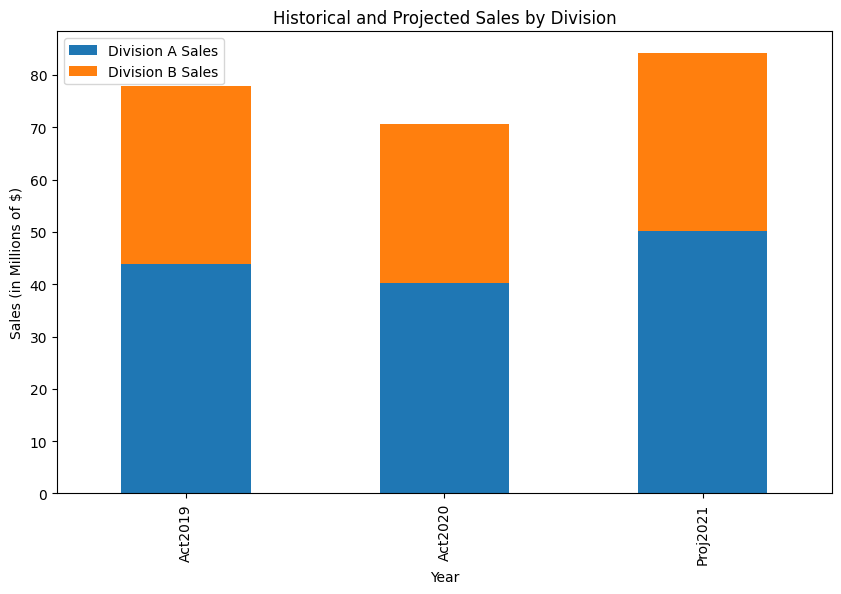

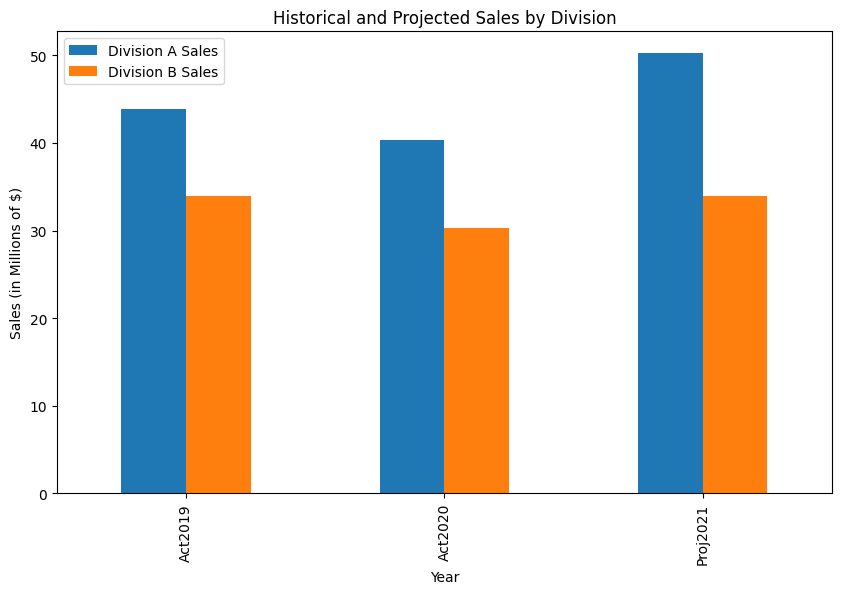

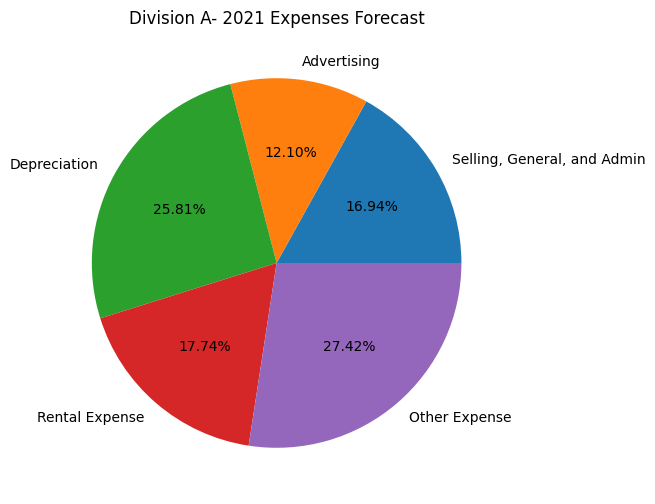

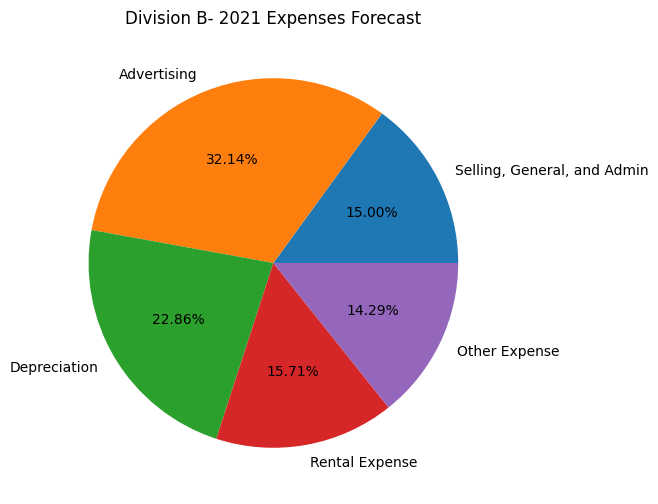

In [9]:
#Income Statements Visualization

import pandas as pd #imports pandas package and assigns the alias "pd" to the imported package
import matplotlib.pyplot as plt #imports pyplot module from matplotlib package and assigns the alias "plt" to the imported module

#only data from 6th row onward are loaded into dataframes
dfSalesOverTimea = pd.read_csv ("diva-incstmt.csv", skiprows=5)
dfSalesOverTimeb = pd.read_csv ("divb-incstmt.csv", skiprows=5)

#columns are renamed; purpose is to ensure that the 5th column "Blank" can be dropped
dfSalesOverTimea.columns = ["CODE", "Description", "Act2019", "Act2020", "Blank", "Proj2021"]
dfSalesOverTimeb.columns = ["CODE", "Description", "Act2019", "Act2020", "Blank", "Proj2021"]

#targets the scope of the dataframe to the "SALE" row while removing the "Blank" columns
dfSalesOverTimea_Filtered = dfSalesOverTimea[dfSalesOverTimea["CODE"]== "SALE"].drop(columns= ["Blank"])
dfSalesOverTimeb_Filtered = dfSalesOverTimeb[dfSalesOverTimeb["CODE"]== "SALE"].drop(columns= ["Blank"])

#both dataframes merged; first row ("Sales") and columns from index 2 onward ("Act2019, "Act2020", and "Proj2021") are selected; all values are converted to numeric type for purposes of plotting;
# new columns "Year", "Division A Sales", and "Division B Sales" are created
dfSalesOverTimeCombined = pd.DataFrame({"Year": ["Act2019", "Act2020", "Proj2021"],
                                        "Division A Sales": dfSalesOverTimea_Filtered.iloc[0,2:].astype(float),
                                        "Division B Sales": dfSalesOverTimeb_Filtered.iloc[0,2:].astype(float)})

#create stacked bar chart that includes both divisions' sales
dfSalesOverTimeCombined.set_index("Year").plot(kind= "bar",
                                              stacked= True,
                                              figsize=(10,6), #figure size enhanced to improve readability
                                              title= "Historical and Projected Sales by Division",
                                              xlabel= "Year",
                                              ylabel= "Sales (in Millions of $)")

plt.show() #display stacked bar chart

#create clustered bar chart of sales over time that includes both divisions' sales; axes labelled, legend shown
dfSalesOverTimeCombined.set_index("Year").plot(
    kind = "bar",
    figsize = (10,6), #figure size enhanced to improve readability
    title = "Historical and Projected Sales by Division",
    xlabel="Year",
    ylabel="Sales (in Millions of $)",
    legend= True)

plt.show() #display clustered bar chart

#creates list of expense categories used for filtering
expense_categories = ["SGA", "ADV", "DEP", "RENT", "OTHX"]

#isolates rows where the "CODE" matches an item in the expense_categories list; filters relevant columns "Description" and "Proj2021"
projected2021a = dfSalesOverTimea[dfSalesOverTimea["CODE"].isin(expense_categories)][["Description", "Proj2021"]]
projected2021b = dfSalesOverTimeb[dfSalesOverTimeb["CODE"].isin(expense_categories)][["Description", "Proj2021"]]

#converts values in "Proj2021" column to numeric data type
projected2021a["Proj2021"] = pd.to_numeric(projected2021a["Proj2021"])
projected2021b["Proj2021"] = pd.to_numeric(projected2021b["Proj2021"])

#create pie chart for projected2021a dataframe
ax_a= projected2021a.set_index("Description").plot(
    kind= "pie", #type of chart specified
    y= "Proj2021",
    autopct = "%.2f%%", #percentages formatted to 2 decimal places
    figsize = (10,6),
    title = "Division A- 2021 Expenses Forecast", #title given
    legend= False
)
ax_a.set_ylabel("") #default y-axis label removed

#create pie chart for projected2021b dataframe
ax_b = projected2021b.set_index("Description").plot(
    kind= "pie", #type of chart specified
    y= "Proj2021",
    autopct = "%.2f%%", #percentages formatted to 2 decimal places
    figsize = (10,6),
    title = "Division B- 2021 Expenses Forecast",
    legend= False
)
ax_b.set_ylabel("") #default y-axis label removed

plt.show() #display pie charts

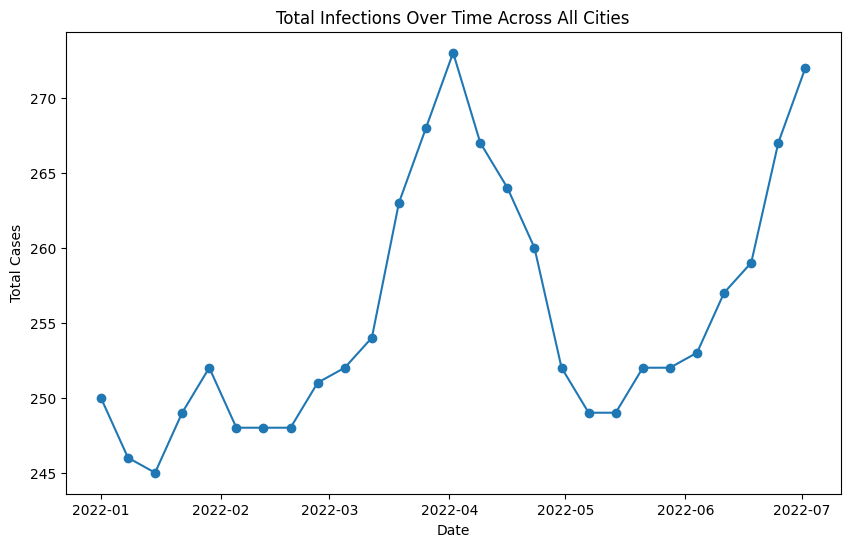

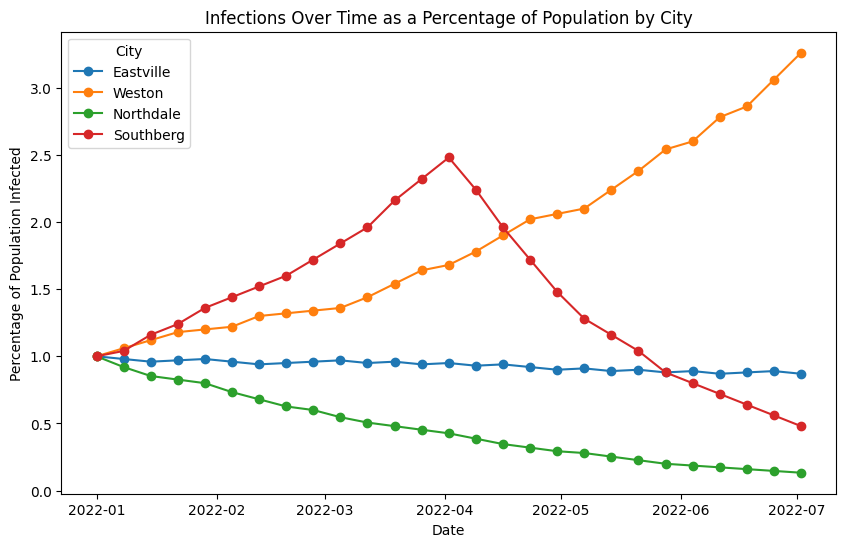

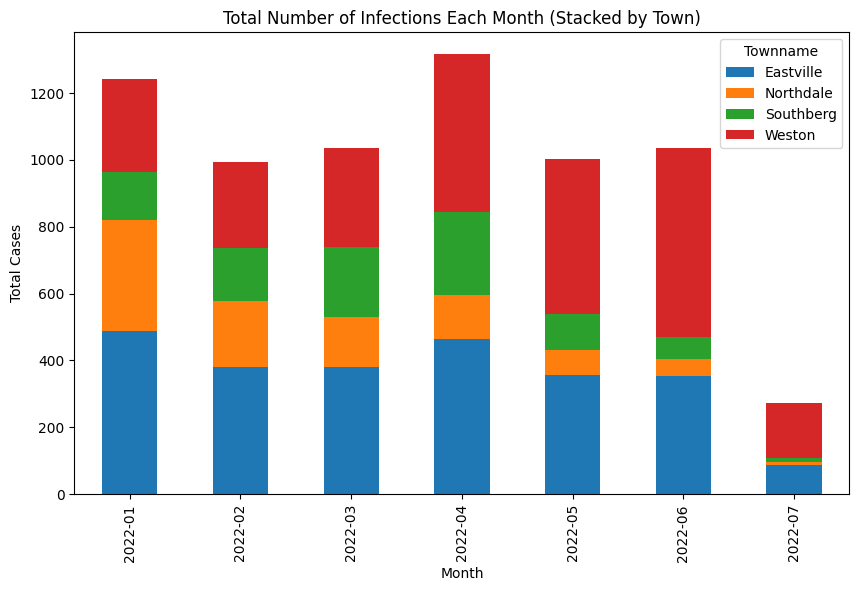

In [10]:
#Tracking Infections Visualization

dfCountyHealth = pd.read_csv("countyhealth.csv") #read CSV file into dataframe

dfCountyHealth["Date"] = pd.to_datetime(dfCountyHealth["Date"]) #convert values in "Date" column of dfCountyHealth dataframe to datetime format

# aggregates "Cases" by unique dates; groupby() method converts "Date" to index; reset_index() method converts "Date" back to regular column
Total_Cases_Over_Time = dfCountyHealth.groupby("Date")["Cases"].sum().reset_index()

#line chart created using matplotlib's pyplot module; axes labelled and title given; circular marker is added to each data point
plt.figure(figsize = (10,6))
plt.plot(Total_Cases_Over_Time["Date"], Total_Cases_Over_Time["Cases"], marker="o")
plt.title("Total Infections Over Time Across All Cities")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.show()

dfCountyPop = pd.read_csv("countypop.csv") #read CSV file into dataframe

#dataframes "dfCountyHealth" and "dfCountyPop" are merged via the common column "Towncode"
dfMerged = pd.merge(dfCountyHealth, dfCountyPop, on = "Towncode")

#new column called "Case Percentage" created; percentage of cases relative to population computed
dfMerged["Case Percentage"] = dfMerged["Cases"]/dfMerged["Population"]* 100

#creates line chart
plt.figure(figsize = (10,6))
for town in dfMerged["Townname"].unique(): #iterates through each unique townname in the "Townname" column
  town_data = dfMerged[dfMerged["Townname"] == town]
  plt.plot(town_data["Date"], town_data["Case Percentage"], label = town, marker = "o") #plots "Case Percentage" on y-axis and "Date" on x-axis; circular marker is added to each data point

#title given; axes labelled, legend shown
plt.title("Infections Over Time as a Percentage of Population by City")
plt.xlabel("Date")
plt.ylabel("Percentage of Population Infected")
plt.legend(title = "City")
plt.show()

#each value in "Date" column is converted to YYYY-MM format and stored in new column called "Month"
dfMerged["Month"] = dfMerged["Date"].dt.to_period("M")

#values in the "Cases" column are aggregated by unique combinations of "Month" and "Townname"; groupby() method converts "Month" and "Townname" to indices; reset_index() method converts "Month" and "Townname"
#back into regular columns; aggregated cases grouped by "Month" and "Townname" are stored in variable called Monthly_Cases
Monthly_Cases = dfMerged.groupby(["Month", "Townname"])["Cases"].sum().reset_index()
Monthly_Pivot = Monthly_Cases.pivot(index= "Month", columns= "Townname", values = "Cases") #pivot table created, one row for each unique "Month" and one column for each unique "Townname"

#pivot table converted to stacked bar chart
Monthly_Pivot.plot(kind= "bar", stacked = True, figsize = (10, 6))

#title given, axes labelled, legend is stratified by town names, plot is shown
plt.title("Total Number of Infections Each Month (Stacked by Town)")
plt.xlabel("Month")
plt.ylabel("Total Cases")
plt.legend(title = "Townname")
plt.show()



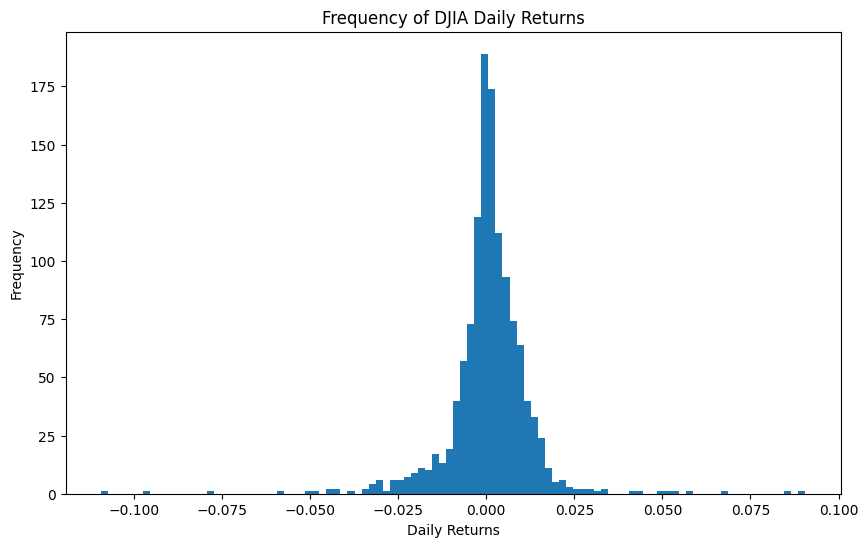

Skewness= -0.79
Kurtosis= 18.24
Skewness test p-value: 2.4904e-24
The data shows significant skewness.
Kurtosis test p-value: 1.8522e-69
The data shows significant kurtosis.
Outliers greater than +3 standard deviations
           Date  Daily Returns
498  2018-12-26       0.050525
794  2020-03-02       0.043308
796  2020-03-04       0.042034
800  2020-03-10       0.051744
803  2020-03-13       0.085487
805  2020-03-17       0.053993
810  2020-03-24       0.090601
812  2020-03-26       0.058390
819  2020-04-06       0.067166

Outliers less than -3 standard deviations
           Date  Daily Returns
274  2018-02-05      -0.041823
277  2018-02-08      -0.037508
792  2020-02-27      -0.044912
799  2020-03-09      -0.078094
801  2020-03-11      -0.048748
802  2020-03-12      -0.095678
804  2020-03-16      -0.109425
806  2020-03-18      -0.050633
808  2020-03-20      -0.043093
816  2020-04-01      -0.045004
865  2020-06-11      -0.057650


In [12]:
#Distribution and Outliers (DJIA)

dfDJIA = pd.read_csv("USIX.csv") #read CSV file into dataframe

dfDJIA["Daily Returns"] = dfDJIA["AdjustedClose"].pct_change() #percentage change in "AdjustedClose" between pairs of adjacent days is calculated as "Daily Returns" for DJIA

#histogram plotted with frequency of "Daily Returns" on the y-axis; range of daily returns divided into 100 intervals; title given; axes labelled
plt.figure(figsize=(10,6)) #figure size enhanced to improve readability
plt.hist(dfDJIA["Daily Returns"].dropna(), bins = 100)
plt.title("Frequency of DJIA Daily Returns")
plt.xlabel("Daily Returns")
plt.ylabel("Frequency")
plt.show()


#skewness and kurtosis of DJIA daily returns computed
print("Skewness=", round(dfDJIA["Daily Returns"].skew(),2))
print("Kurtosis=", round(dfDJIA["Daily Returns"].kurt(),2))



import scipy.stats as stats #stats module from scipy package is imported; alias "stats" is assigned to imported module
#skewness and kurtosis tests on values of "Daily Returns" column of dfDJIA dataframe; missing values excluded; default confidence level of 95%
skewnesstest_pvalue = stats.skewtest(dfDJIA["Daily Returns"].dropna()).pvalue
kurtosistest_pvalue = stats.kurtosistest(dfDJIA["Daily Returns"].dropna()).pvalue

#display skewness test p-value to four decimal places with scientific notation
print("Skewness test p-value: {:.4e}".format(skewnesstest_pvalue))
if skewnesstest_pvalue < 0.05:
      print("The data shows significant skewness.")
else:
      print("The data does not show significant skewness.")

#display kurtosis test p-value to four decimal places with scientific notation
print("Kurtosis test p-value: {:.4e}".format(kurtosistest_pvalue))
if kurtosistest_pvalue < 0.05:
      print("The data shows significant kurtosis.")
else:
      print("The data does not show significant kurtosis.")



sd = dfDJIA["Daily Returns"].std() #compute standard deviation of dJIA daily returns
round(sd, 3)

#filters dataframe to include only rows where "Daily Returns" are 3 standard deviations above or below the mean
dfDJIA1 = dfDJIA[(dfDJIA["Daily Returns"] > (3*sd))]
dfDJIA2 = dfDJIA[(dfDJIA["Daily Returns"] < (-sd * 3))]

#further filters dataframes to include only "Date" and "Daily Returns" columns
dfDJIA1_filtered = dfDJIA1[["Date", "Daily Returns"]]
dfDJIA2_filtered = dfDJIA2[["Date", "Daily Returns"]]

#displays indices, dates, and daily returns for outliers greater than 3 standard deviations above the mean
print("Outliers greater than +3 standard deviations")
print(dfDJIA1_filtered)

#displays indices, dates, and daily returns for outliers greater than 3 standard deviations below the mean
print("\nOutliers less than -3 standard deviations")
print(dfDJIA2_filtered)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Please enter the input file name:The Swing of the Pendulum.txt
['PART', 'I', 'CHAPTER', 'ONE', 'Jean', 'Norris', 'came', 'slowly', 'down', 'the', 'Library', 'steps', 'passed', 'the', 'Chemistry', 'Building', 'and', 'took', 'the', 'worn', 'path', 'across', 'the', 'campus', 'to', 'the', 'brush-lined', 'creek', 'The', 'hot', 'stubble', 'burned', 'through', 'her', 'white', 'canvas', 'shoes', 'and', 'fine', 'gray', 'dust', 'powdered', 'the', 'mortarboard', 'and', 'black', 'graduating', 'gown', 'she', 'carried', 'over', 'her', 'arm', 'With', 'one', 'stride', 'she', 'crossed', 'the', 'trickle', 'of', 'water', 'and', 'scrambled', 'up', 'the', 'opposite', 'bank', 'Lord', 'She', 'drew', 'a', 'deep', 'breath', 'of', 'the', 'shaded', 'coolness', 'and', 'taking', 'off', 'the', 'mortarboard', 'ran', 'the', 'tips', 'of', 'her', 'fingers', 'under', 'the', 'heavy', 'plait', 'of', 'pale', 'brown', 'hair', 'Thank', 'God', 'this']


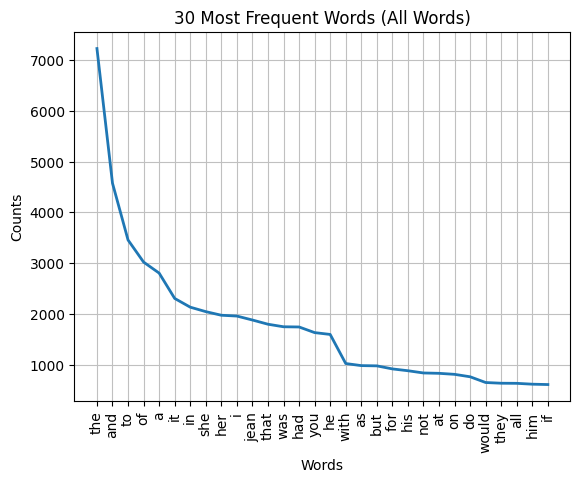

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


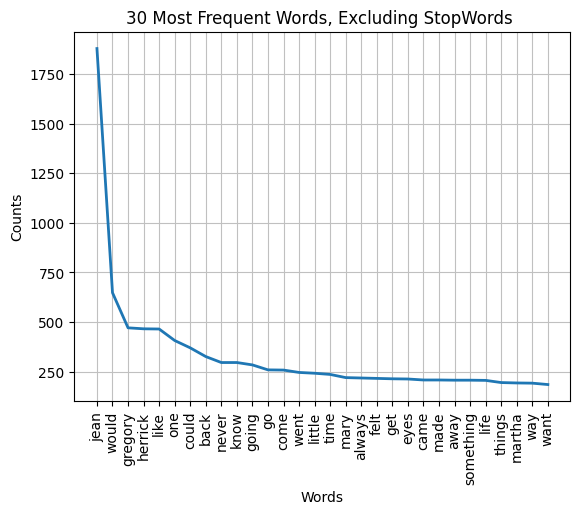

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


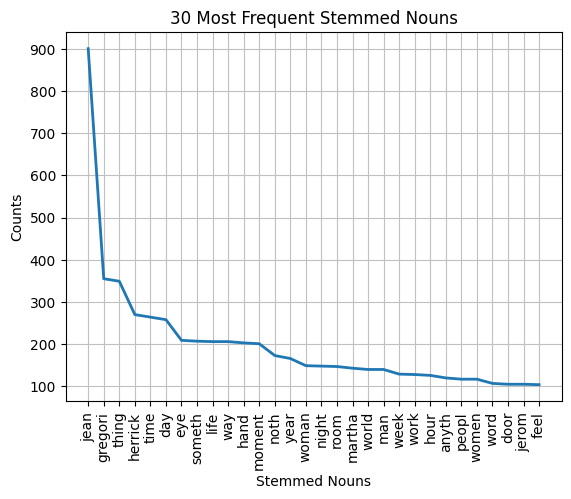

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Positive Sentiment Score:0.121
Neutral Sentiment Score:0.791
Negative Sentiment Score:0.087
Compound Sentiment Score:1.0


In [13]:
#Text Analysis - The Swing of the Pendulum by Adriana Spadoni

import nltk #import Natural Language Tool Kit, a Natural Language Processing Library
nltk.download("punkt_tab") #download punkt_tab module from the nltk library

from textblob import TextBlob #imports TextBlob class from textblob library

input_file = input ("Please enter the input file name:") #prompts user to input file name: "The Swing of the Pendulum.txt"
f = open(input_file, "r", encoding = "utf-8-sig") #reads specified file; removes Byte Order Mark
AllText = f.read() #read the contents of the file; assign contents of the file to variable called AllText
f.close() #close file

start_index = AllText.index("PART I") #locate index at which the text begins; excludes book description, title page, and table of contents
end_index = AllText.index("THE END.") #locate index at which text ends; excludes copyright disclaimer and extraneous text

TruncatedText = AllText[start_index:end_index].strip() #use slicing to indicate the beginning and end of the desired text; remove leading and trailing whitespaces

blob = TextBlob(TruncatedText) #AllText argument is passed to TextBlob class; object blob created

tokens = blob.words #tokenizes the blob object into individual words
print(tokens[:100]) #display first 100 tokens



words1 = [token for token in tokens if token.isalpha()] #filter out words that do not contain only letters
words2 = [word.lower() for word in words1] #convert all words into lowercase
WordFrequency1 = nltk.FreqDist(words2) #keeps track of frequency of each element (lowercase word that contains only letters) in list called "words2"

#plots line chart with counts on y-axis and specific word (lowercase word that contains only letters) on x-axis; title given ; axes labelled; plot shown
WordFrequency1.plot(30, title = "30 Most Frequent Words (All Words)")
plt.xlabel("Words")
plt.ylabel("Counts")
plt.show()



nltk.download("stopwords") #downloads "stopwords" dataset from nltk library
from nltk.corpus import stopwords #imports "stopwords" dataset from corpus module within nltk library

StopWords = stopwords.words("english") # .words() method is used to retrieve English stopwords from "stopwords" dataset; list of English stopwords stored in list variable called "StopWords"
words3 = [word for word in words2 if word not in StopWords] #filter out English stopwords
WordFrequency2 = nltk.FreqDist(words3) #keeps track of frequency of each element in list called "words3" (English stopwords have been filtered out)

#plots line chart with counts on y-axis and specific word (lowercase word that contains only letters; stopwords excluded) on x-axis; title given; axes labelled; plot shown
WordFrequency2.plot(30, title = "30 Most Frequent Words, Excluding StopWords ")
plt.xlabel("Words")
plt.ylabel("Counts")
plt.show()


nltk.download("averaged_perceptron_tagger_eng") #downloads part-of-speech tagging model from nltk library
from nltk import pos_tag #pos_tag function imported from nltk library

tagged_words = pos_tag(words3) #assigns a part of speech to each word ; result stored in variable called "tagged_words"
words4 = [word for word, pos in tagged_words if pos in ("NN", "NNS", "NNP", "NNPS")] #filters out words that are not singular, plural, singular proper, and plural proper nouns

from nltk.stem import PorterStemmer #imports PorterStemmer class from stem module within nltk library
stemmer = PorterStemmer()  #variable stemmer is assigned an instance of the PorterStemmer class
words5 = [stemmer.stem(noun) for noun in words4] #each item in list "words4" is reduced to its root form (removal of prefixes or suffixes); stemmed words stored in list "words5"
WordFrequency3 = nltk.FreqDist(words5) #keeps track of frequency of each element in list called "words5"

#plots line chart with counts on y-axis and specific word (lowercase; letters only; stopwords excluded; stemmed) on x-axis; title given; axes labelled; plot shown
WordFrequency3.plot(30, title = "30 Most Frequent Stemmed Nouns")
plt.xlabel("Stemmed Nouns")
plt.ylabel("Counts")
plt.show()


from nltk.sentiment import SentimentIntensityAnalyzer #import SentimentIntensityAnalyzer class from sentiment module within nltk library
nltk.download("vader_lexicon") #downloads vader_lexicon dataset from nltk library

sia = SentimentIntensityAnalyzer() #variable sia is assigned an instance of the SentimentIntensityAnalyzer class
polarity_scores = sia.polarity_scores(TruncatedText) #.polarity_scores() method takes truncated text as argument and outputs dictionary with sentiment type (positive, negative, neutral, compound)
#as keys and their correspondings scores as values

#displays sentiment scores; accesses values (scores) of dictionary via keys (sentiment type)
print("Positive Sentiment Score:" + str(polarity_scores["pos"]))
print("Neutral Sentiment Score:" + str(polarity_scores["neu"]))
print("Negative Sentiment Score:" + str(polarity_scores["neg"]))
print("Compound Sentiment Score:" + str(polarity_scores["compound"]))


